## cleaned_df Pre-Processing 

### Khai báo một số thư viện sẽ sử dụng trong quá trình xử lí. 

In [1]:
import pandas as pd 
import numpy as np
import sys  
import re 

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Đầu tiên, ta tiến hành đọc dữ liệu từ file 

In [3]:
raw_df = pd.read_csv('DATA/infant_mortality_data_expanded_2017_2022.csv', sep=',', quotechar='"', header=0)

In [4]:
raw_df.head()

,Cause of death,NICU Admission,Antibiotics for Mother,Mother's Pre-pregnancy BMI,Infant birth weight,Deaths,Births,Death rate per 1000,Year
0,Other and unspecified gastroenteritis and coli...,Yes,Yes,Overweight 25.0-29.9,500 - 749 grams,12.0,726.0,16.56 (Unreliable),2017
1,Other and unspecified gastroenteritis and coli...,Yes,No,Normal 18.5-24.9,500 - 749 grams,13.0,1254.0,10.40 (Unreliable),2017
2,Other and unspecified gastroenteritis and coli...,Yes,No,Normal 18.5-24.9,750 - 999 grams,10.0,1701.0,5.88 (Unreliable),2017
3,Other and unspecified gastroenteritis and coli...,Yes,No,Overweight 25.0-29.9,500 - 749 grams,12.0,994.0,12.08 (Unreliable),2017
4,Newborn affected by incompetent cervix,No,Yes,Normal 18.5-24.9,499 grams or less,12.0,270.0,45.00 (Unreliable),2017


### Số lượng cột và hàng của mẫu. 

In [5]:
shape = raw_df.shape

In [6]:
# TESTING: 
print(f'Số lượng dòng và cột: {shape}')

if shape[0] > 1000:
    print("số lượng mẫu đạt yêu cầu")
else: 
    print("số lượng mẫu không đạt yêu cầu, ta cần thêm dữ liệu")



Số lượng dòng và cột: (1443, 9)
số lượng mẫu đạt yêu cầu


### Mẫu có tồn tại trùng lặp không ? 
- sau khi ta đã xác định có số lượng mẫu đủ để tiếp tục xử lí thì tiến hành kiểm tra sự trung lặp `num_duplicated_rows` để giảm bớt các mẫu không cần thiết.  

In [7]:
num_duplicates = raw_df.duplicated().sum()

In [8]:
# TESTING:
if num_duplicates > 0:
    print(f'Số lượng dòng bị trùng: {num_duplicates}')
    print("Bạn cần xử lý dữ liệu trùng lặp")
else: 
    print("Không có dòng nào bị trùng")

Không có dòng nào bị trùng


sau khi kiểm tra ta thấy dữ liệu không còn trùng lặp ta tiếp tục đi sau hơn vào từng cột.  

### Các cột trong mẫu có ý nghĩa như thế nào?  
Để kiểm tra ý nghĩa của từng cột: 
- Ta lấy của các cột thông tin từ `raw_`. 
- Do chưa được mã hóa nên cột mang ý nghĩa của chính nó mà không phải thông qua giải thích.  
- Tiếp đó ta `hiển thị` các cột được lấy lên màn hình để quan sát. 

In [9]:
col_mean = pd.DataFrame(raw_df.columns, columns=['Meaning'])

In [10]:
col_mean

,Meaning
0,Cause of death
1,NICU Admission
2,Antibiotics for Mother
3,Mother's Pre-pregnancy BMI
4,Infant birth weight
5,Deaths
6,Births
7,Death rate per 1000
8,Year


Ý nghĩa: 
- `Cause of death`: thể hiện nguyên nhân dẫn đến tử vong. 
- `NICU Admission`: (NICU -Neonatal Intensive Care Unit) Chỉ ra liệu trẻ sơ sinh có được chuyển đến khoa chăm sóc đặc biệt cho trẻ hay không. 
- `Antibiotics for Mother`: Chỉ ra liệu người mẹ có sử dụng kháng sinh trong quá trình thai kỳ hay không. 
- `Mother's Pre-pregnancy BMI`: Phản ánh chỉ số khối - thể trạng (BMI) của người mẹ trước khi mang thai. 
- `Infant Birth weight`: Cân nặng khi sinh của trẻ. 
- `Deaths`: Số ca tử vong của trẻ sơ sinh. 
- `Births`: Tổng số trẻ được sinh ra trong năm. 
- `Death rate per 1000`: tỉ lệ 1/1000 khả năng trẻ sẽ tử vong trong năm. 
- `Year`: Thời điểm Dữ liệu được thu thập.


### Kiểu dữ liêu của từng cột là gì? Dữ liều này có hợp lý hay không, có cần phải chuyển đổi các dữ liệu không? 

In [11]:
dtypes = raw_df.dtypes

In [12]:
dtypes

Cause of death                 object
NICU Admission                 object
Antibiotics for Mother         object
Mother's Pre-pregnancy BMI     object
Infant birth weight            object
Deaths                        float64
Births                        float64
Death rate per 1000            object
Year                            int64
dtype: object

#### Ta tiến hành xem lại và xử lí từng côt dữ liệu nếu chưa hợp lí. 

In [13]:
raw_df.head(10)

,Cause of death,NICU Admission,Antibiotics for Mother,Mother's Pre-pregnancy BMI,Infant birth weight,Deaths,Births,Death rate per 1000,Year
0,Other and unspecified gastroenteritis and coli...,Yes,Yes,Overweight 25.0-29.9,500 - 749 grams,12.0,726.0,16.56 (Unreliable),2017
1,Other and unspecified gastroenteritis and coli...,Yes,No,Normal 18.5-24.9,500 - 749 grams,13.0,1254.0,10.40 (Unreliable),2017
2,Other and unspecified gastroenteritis and coli...,Yes,No,Normal 18.5-24.9,750 - 999 grams,10.0,1701.0,5.88 (Unreliable),2017
3,Other and unspecified gastroenteritis and coli...,Yes,No,Overweight 25.0-29.9,500 - 749 grams,12.0,994.0,12.08 (Unreliable),2017
4,Newborn affected by incompetent cervix,No,Yes,Normal 18.5-24.9,499 grams or less,12.0,270.0,45.00 (Unreliable),2017
5,Newborn affected by incompetent cervix,No,Yes,Obesity I 30.0-34.9,499 grams or less,12.0,151.0,79.80 (Unreliable),2017
6,Newborn affected by incompetent cervix,No,Yes,Obesity II 35.0-39.9,499 grams or less,11.0,98.0,113.24 (Unreliable),2017
7,Newborn affected by incompetent cervix,No,No,Normal 18.5-24.9,499 grams or less,57.0,880.0,65.21,2017
8,Newborn affected by incompetent cervix,No,No,Overweight 25.0-29.9,499 grams or less,62.0,721.0,86.45,2017
9,Newborn affected by incompetent cervix,No,No,Obesity I 30.0-34.9,499 grams or less,54.0,593.0,91.66,2017


Sau khi quan sát lại thì ta thấy dữ liệu thu thập được đa phần ở dạng `text` và không thể xử lí trực tiếp được. Vì vậy ta cần chuyển đổi nó về các dạng/kiểu dữ liệu tốt hơn để tiến hành lưu trữ, phù hợp cho các bước tiếp theo. 

### Tiến hành xử lí cột `Cause of death`. 
Các bước xử lí:
- Lấy ra dữ liệu của cột `Cause of death`. 
- Sau đó trích xuất ra các giá trị xuất hiện trong cột. 

In [14]:
cause_of_death_col = raw_df['Cause of death']

cause_of_death_col_unique = cause_of_death_col.unique()

In [15]:
print(f"số lượng khả năng gây tử vong {len(cause_of_death_col_unique)}")
print(cause_of_death_col_unique)

số lượng khả năng gây tử vong 37
['Other and unspecified gastroenteritis and colitis of infectious origin'
 'Newborn affected by incompetent cervix'
 'Newborn affected by premature rupture of membranes'
 'Newborn affected by multiple pregnancy'
 'Newborn affected by other maternal complications of pregnancy'
 'Newborn affected by other forms of placental separation and haemorrhage'
 'Newborn affected by chorioamnionitis' 'Extreme immaturity'
 'Other preterm infants' 'Intrauterine hypoxia, unspecified'
 'Respiratory distress syndrome of newborn'
 'Bronchopulmonary dysplasia originating in the perinatal period'
 'Primary atelectasis of newborn' 'Neonatal cardiac failure'
 'Neonatal cardiac dysrhythmia' 'Bacterial sepsis of newborn, unspecified'
 'Unspecified intraventricular (nontraumatic) haemorrhage of newborn'
 'Necrotizing enterocolitis of newborn'
 'Hypoxic ischemic encephalopathy of newborn' 'Anencephaly'
 'Hypoplastic left heart syndrome'
 'Congenital malformation of heart, unspec

In [16]:
cause_count = cause_of_death_col.value_counts()

cause_percentage = ((cause_count / cause_count.sum()) * 100).round(1)

# chuyển thành DataFrame để dễ dàng quan sát. 
cause_df = cause_percentage.reset_index()
cause_df.columns = ["Cause of death", "Percentage"]

# Sắp xếp theo tỷ lệ giảm dần (nếu cần)
cause_df = cause_df.sort_values(by="Percentage", ascending=False)

In [17]:

sum_of_percentage_greater_than_1 = 0
for i in range(cause_df.shape[0]):
    if cause_df['Percentage'][i] >= 1:
        sum_of_percentage_greater_than_1 += cause_df['Percentage'][i]
        print(f"{cause_df['Cause of death'][i]}: {cause_df['Percentage'][i]}%")


print(f"\ntổng tỷ lệ lớn hơn hoặc bằng 1%: {sum_of_percentage_greater_than_1}%")
print(f"tổng tỷ lệ nhỏ hơn 1%: {100 - sum_of_percentage_greater_than_1}%")

Extreme immaturity: 16.2%
Sudden infant death syndrome - SIDS: 13.9%
Other ill-defined and unspecified causes of mortality: 12.1%
Accidental suffocation and strangulation in bed: 10.9%
Other preterm infants: 5.5%
Newborn affected by premature rupture of membranes: 5.2%
Edwards syndrome, unspecified: 3.8%
Respiratory distress syndrome of newborn: 3.5%
Bacterial sepsis of newborn, unspecified: 3.5%
Newborn affected by incompetent cervix: 3.2%
Newborn affected by chorioamnionitis: 2.8%
Necrotizing enterocolitis of newborn: 2.7%
Congenital malformation of heart, unspecified: 2.3%
Neonatal cardiac dysrhythmia: 1.9%
Unspecified intraventricular (nontraumatic) haemorrhage of newborn: 1.8%
Anencephaly: 1.7%
Newborn affected by other forms of placental separation and haemorrhage: 1.7%
Neonatal cardiac failure: 1.7%
Hypoxic ischemic encephalopathy of newborn: 1.0%

tổng tỷ lệ lớn hơn hoặc bằng 1%: 95.40000000000002%
tổng tỷ lệ nhỏ hơn 1%: 4.59999999999998%


Sau khi quan sát kết quả trên thì ta thấy rằng có thể rút rọn các thông tin lại ít hơn và các tỉ lệ nhỏ hơn 1% ta có thể chuẩn hóa nó thành 1 giá trị riêng là `other cause`. 

In [18]:
# Bảng ánh xạ tên đầy đủ sang tên rút gọn
cause_mapping = {
    "Extreme immaturity": "Extreme immaturity",
    "Sudden infant death syndrome - SIDS": "SIDS",
    "Other ill-defined and unspecified causes of mortality": "Unspecified causes",
    "Accidental suffocation and strangulation in bed": "Accidental suffocation",
    "Other preterm infants": "Other preterm infants",
    "Newborn affected by premature rupture of membranes": "Premature rupture",
    "Edwards syndrome, unspecified": "Edwards syndrome",
    "Respiratory distress syndrome of newborn": "Respiratory distress",
    "Bacterial sepsis of newborn, unspecified": "Bacterial sepsis",
    "Newborn affected by incompetent cervix": "Incompetent cervix",
    "Newborn affected by chorioamnionitis": "Chorioamnionitis",
    "Necrotizing enterocolitis of newborn": "Necrotizing enterocolitis",
    "Congenital malformation of heart, unspecified": "Congenital heart defect",
    "Neonatal cardiac dysrhythmia": "Cardiac dysrhythmia",
    "Unspecified intraventricular (nontraumatic) haemorrhage of newborn": "Intraventricular haemorrhage",
    "Anencephaly": "Anencephaly",
    "Newborn affected by other forms of placental separation and haemorrhage": "Placental separation",
    "Neonatal cardiac failure": "Cardiac failure",
    "Hypoxic ischemic encephalopathy of newborn": "HIE of newborn"  
}

# Hàm thay thế giá trị, nếu không có trong bảng ánh xạ thì thay thành 'Other causes'
def replace_causes(cause_name):
    return cause_mapping.get(cause_name, "Other causes")

# Áp dụng thay thế trên cột "Cause of death"
raw_df["Cause of death"] = raw_df["Cause of death"].apply(replace_causes)

# Kiểm tra kết quả
print(raw_df["Cause of death"].value_counts())


Extreme immaturity              234
SIDS                            201
Unspecified causes              175
Accidental suffocation          157
Other preterm infants            80
Premature rupture                75
Other causes                     66
Edwards syndrome                 55
Respiratory distress             50
Bacterial sepsis                 50
Incompetent cervix               46
Chorioamnionitis                 40
Necrotizing enterocolitis        39
Congenital heart defect          33
Cardiac dysrhythmia              28
Intraventricular haemorrhage     26
Anencephaly                      25
Placental separation             25
Cardiac failure                  24
HIE of newborn                   14
Name: Cause of death, dtype: int64


`Chú ý:` Mặc dù chúng ta đã chuyển đổi dữ liệu về các dạng dễ hơn. Tuy nhiên vẫn có một số bất cập với giá trị `Other cause` vì đây là tổng hợp của các giá trị nhỏ và có thể gần như không có ý nghĩa đối với việc phân tích, Nhưng với số lượng chiếm 4% tổng số (>1000 mẫu) ta có thể cân nhắc việc loại bỏ giá trị này.

In [19]:
raw_df.head(10)

,Cause of death,NICU Admission,Antibiotics for Mother,Mother's Pre-pregnancy BMI,Infant birth weight,Deaths,Births,Death rate per 1000,Year
0,Other causes,Yes,Yes,Overweight 25.0-29.9,500 - 749 grams,12.0,726.0,16.56 (Unreliable),2017
1,Other causes,Yes,No,Normal 18.5-24.9,500 - 749 grams,13.0,1254.0,10.40 (Unreliable),2017
2,Other causes,Yes,No,Normal 18.5-24.9,750 - 999 grams,10.0,1701.0,5.88 (Unreliable),2017
3,Other causes,Yes,No,Overweight 25.0-29.9,500 - 749 grams,12.0,994.0,12.08 (Unreliable),2017
4,Incompetent cervix,No,Yes,Normal 18.5-24.9,499 grams or less,12.0,270.0,45.00 (Unreliable),2017
5,Incompetent cervix,No,Yes,Obesity I 30.0-34.9,499 grams or less,12.0,151.0,79.80 (Unreliable),2017
6,Incompetent cervix,No,Yes,Obesity II 35.0-39.9,499 grams or less,11.0,98.0,113.24 (Unreliable),2017
7,Incompetent cervix,No,No,Normal 18.5-24.9,499 grams or less,57.0,880.0,65.21,2017
8,Incompetent cervix,No,No,Overweight 25.0-29.9,499 grams or less,62.0,721.0,86.45,2017
9,Incompetent cervix,No,No,Obesity I 30.0-34.9,499 grams or less,54.0,593.0,91.66,2017


### Tiến hành xử lí cột `NICU Admission` và `Antibiotics for Mother`.  
Có thể thấy hai cột trên mạng dữ liệu là `Yes` và `No`. Do đó ta sẽ chuyển dữ liệu về dạng số `1` và `0` để có thể dễ dàng xử lí.  

In [20]:
raw_df['NICU Admission'] = raw_df['NICU Admission'].map({'Yes': 1, 'No': 0})
raw_df['Antibiotics for Mother'] = raw_df['Antibiotics for Mother'].map({'Yes': 1, 'No': 0})

In [21]:
raw_df.head(5)

,Cause of death,NICU Admission,Antibiotics for Mother,Mother's Pre-pregnancy BMI,Infant birth weight,Deaths,Births,Death rate per 1000,Year
0,Other causes,1,1,Overweight 25.0-29.9,500 - 749 grams,12.0,726.0,16.56 (Unreliable),2017
1,Other causes,1,0,Normal 18.5-24.9,500 - 749 grams,13.0,1254.0,10.40 (Unreliable),2017
2,Other causes,1,0,Normal 18.5-24.9,750 - 999 grams,10.0,1701.0,5.88 (Unreliable),2017
3,Other causes,1,0,Overweight 25.0-29.9,500 - 749 grams,12.0,994.0,12.08 (Unreliable),2017
4,Incompetent cervix,0,1,Normal 18.5-24.9,499 grams or less,12.0,270.0,45.00 (Unreliable),2017


### Xử lí cột `Mother's Pre-prehnancy BMI`. 

In [22]:
mother_pre_col = raw_df["Mother's Pre-pregnancy BMI"]

mother_pre_col_unique = mother_pre_col.unique()
mother_pre_col_unique

array(['Overweight 25.0-29.9', 'Normal 18.5-24.9', 'Obesity I 30.0-34.9',
       'Obesity II 35.0-39.9', 'Extreme Obesity III > 39.9',
       'Unknown or Not Stated', 'Underweight <18.5'], dtype=object)

Thông qua các giá trị xuất hiện trong cột, ta thực hiện mapping dưới dạng số.

In [23]:
bmi_mapping = {
    'Underweight <18.5': 0,
    'Normal 18.5-24.9': 1,
    'Overweight 25.0-29.9': 2,
    'Obesity I 30.0-34.9': 3,
    'Obesity II 35.0-39.9': 4,
    'Extreme Obesity III > 39.9': 5,
    'Unknown or Not Stated': -1
}

# Thay thế giá trị trong cột
raw_df["Mother's Pre-pregnancy BMI"] = raw_df["Mother's Pre-pregnancy BMI"].map(bmi_mapping)

### Xử lí cột `Infant birth weight`.

In [24]:
infant_birth_weight_col = raw_df["Infant birth weight"]

infant_birth_weight_col_unique = infant_birth_weight_col.unique()
infant_birth_weight_col_unique

array(['500 - 749 grams', '750 - 999 grams', '499 grams or less',
       '1000 - 1249 grams', '3000 - 3499 grams', '3500 - 3999 grams',
       '1500 - 1999 grams', '2000 - 2499 grams', '2500 - 2999 grams',
       '4000 - 4499 grams', '1250 - 1499 grams'], dtype=object)

Hiện tại ta thấy cột trên là biểu diễn về trọng lượng của trẻ khi sinh đo đó ta sẽ chuyển đổi giá trị về giá trị trung bình. 

In [25]:
def convert_to_mean(weight_str):
    # Xử lý khoảng giá trị (e.g., "500 - 749 grams")
    match = re.match(r"(\d+)\s*-\s*(\d+)", weight_str)
    if match:
        low, high = map(int, match.groups())
        return (low + high) / 2  # Trả về trung bình
    
    # Xử lý "less" hoặc "more" (e.g., "499 grams or less")
    match = re.match(r"(\d+)\s*grams or less", weight_str)
    if match:
        return int(match.group(1)) / 2  # Trả về trung bình
    
    # Nếu không khớp định dạng
    return None

# Áp dụng cho cột "Infant birth weight"
raw_df["Infant birth weight"] = raw_df["Infant birth weight"].apply(convert_to_mean)

### Xử lí cột `Death rate per 1000`. 
- Trong phần này ta sẽ cố gắng loại bỏ các phần `text` trong giá trị của cột. 

In [26]:
raw_df["Death rate per 1000"] = raw_df["Death rate per 1000"].str.replace(r"\s*\(Unreliable\)", "", regex=True).astype(float)


In [27]:
raw_df.head(10)

,Cause of death,NICU Admission,Antibiotics for Mother,Mother's Pre-pregnancy BMI,Infant birth weight,Deaths,Births,Death rate per 1000,Year
0,Other causes,1,1,2,624.5,12.0,726.0,16.56,2017
1,Other causes,1,0,1,624.5,13.0,1254.0,10.40,2017
2,Other causes,1,0,1,874.5,10.0,1701.0,5.88,2017
3,Other causes,1,0,2,624.5,12.0,994.0,12.08,2017
4,Incompetent cervix,0,1,1,249.5,12.0,270.0,45.00,2017
5,Incompetent cervix,0,1,3,249.5,12.0,151.0,79.80,2017
6,Incompetent cervix,0,1,4,249.5,11.0,98.0,113.24,2017
7,Incompetent cervix,0,0,1,249.5,57.0,880.0,65.21,2017
8,Incompetent cervix,0,0,2,249.5,62.0,721.0,86.45,2017
9,Incompetent cervix,0,0,3,249.5,54.0,593.0,91.66,2017


### Kiểm tra lại kiểu dữ liệu của từng cột và chuyển đổi lại nếu cần thiết. 

In [28]:
raw_df.dtypes

Cause of death                 object
NICU Admission                  int64
Antibiotics for Mother          int64
Mother's Pre-pregnancy BMI      int64
Infant birth weight           float64
Deaths                        float64
Births                        float64
Death rate per 1000           float64
Year                            int64
dtype: object

chuyển đổi `Deaths` và `Births` về dạng dữ liệu `int64`

In [29]:
raw_df['Deaths'] = raw_df['Deaths'].astype('int64')
raw_df['Births'] = raw_df['Births'].astype('int64')

In [30]:
raw_df.dtypes

Cause of death                 object
NICU Admission                  int64
Antibiotics for Mother          int64
Mother's Pre-pregnancy BMI      int64
Infant birth weight           float64
Deaths                          int64
Births                          int64
Death rate per 1000           float64
Year                            int64
dtype: object

### Kiểm tra lại có tồn tại giá trị thiếu (missing value) để tiếp tục xử lí.

In [31]:
missing_per_column = raw_df.isnull().sum()
print("Số giá trị missing theo từng cột:")
print(missing_per_column)

Số giá trị missing theo từng cột:
Cause of death                0
NICU Admission                0
Antibiotics for Mother        0
Mother's Pre-pregnancy BMI    0
Infant birth weight           0
Deaths                        0
Births                        0
Death rate per 1000           0
Year                          0
dtype: int64


### lưu dữ liệu vào file để hoàn tất quá trình tiền xử lí (pre-processing)  

In [32]:
raw_df.to_csv('DATA/infant_mortality_data_2017_2022_cleaned.csv', index=False)

## Explore Data

### Khai báo một số thư viện sử dụng để trực quan dữ liệu

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

### Ta tiến hành đọc dữ liệu đã được tiền xử lí từ 

In [34]:
cleaned_df = pd.read_csv('DATA/infant_mortality_data_2017_2022_cleaned.csv')

In [35]:
cleaned_df.head(10)

,Cause of death,NICU Admission,Antibiotics for Mother,Mother's Pre-pregnancy BMI,Infant birth weight,Deaths,Births,Death rate per 1000,Year
0,Other causes,1,1,2,624.5,12,726,16.56,2017
1,Other causes,1,0,1,624.5,13,1254,10.40,2017
2,Other causes,1,0,1,874.5,10,1701,5.88,2017
3,Other causes,1,0,2,624.5,12,994,12.08,2017
4,Incompetent cervix,0,1,1,249.5,12,270,45.00,2017
5,Incompetent cervix,0,1,3,249.5,12,151,79.80,2017
6,Incompetent cervix,0,1,4,249.5,11,98,113.24,2017
7,Incompetent cervix,0,0,1,249.5,57,880,65.21,2017
8,Incompetent cervix,0,0,2,249.5,62,721,86.45,2017
9,Incompetent cervix,0,0,3,249.5,54,593,91.66,2017


### Ta sẽ sử dụng biểu đồ bar plot để biểu diễn tần xuất các giá trị trong từng cột.


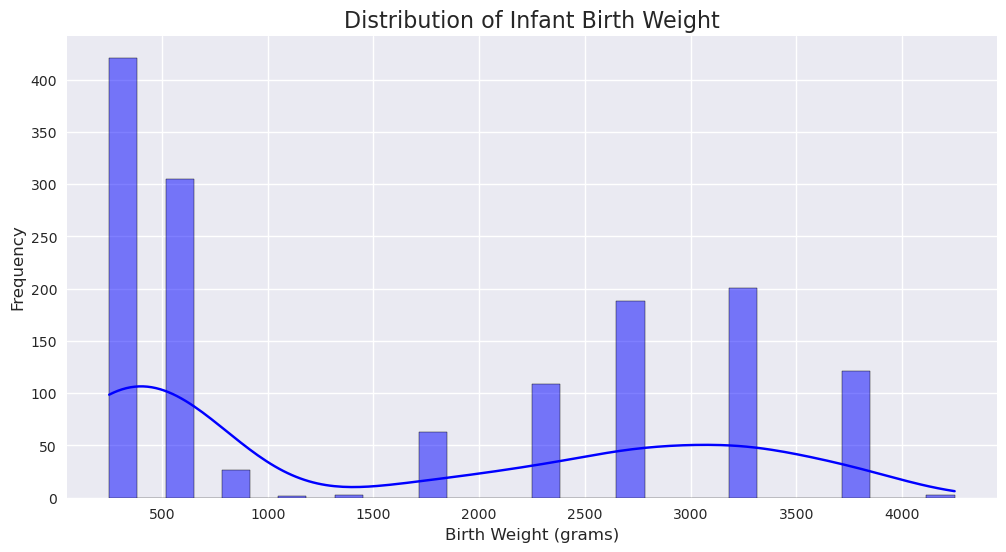

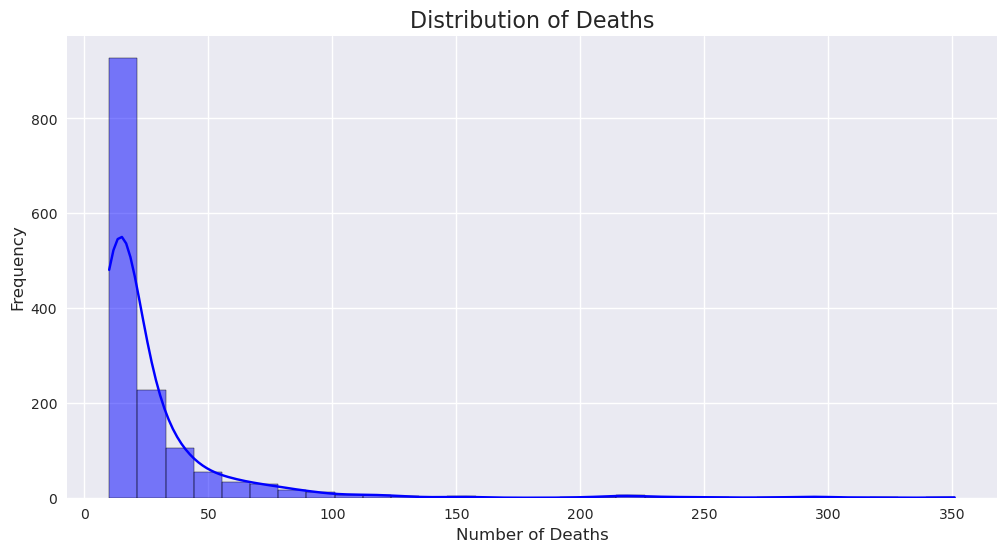

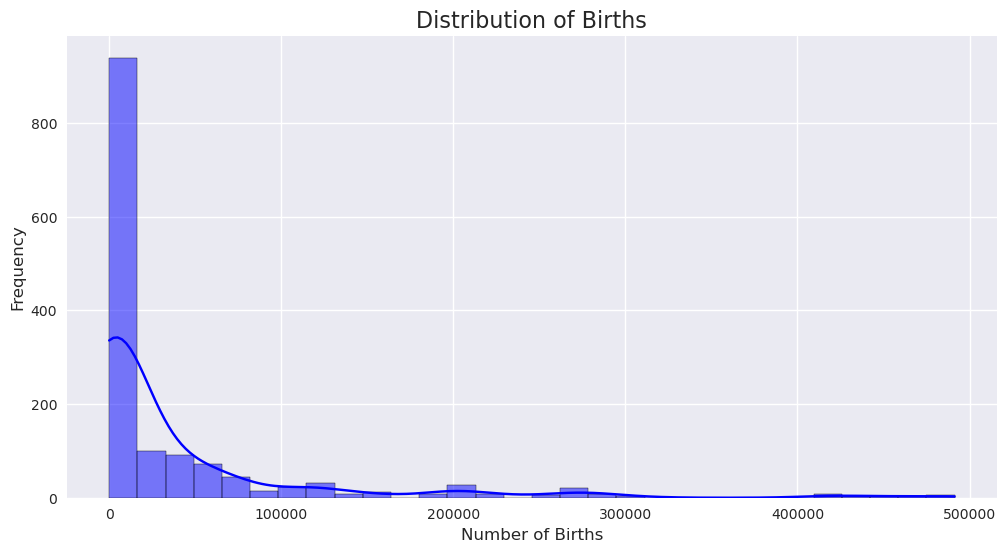

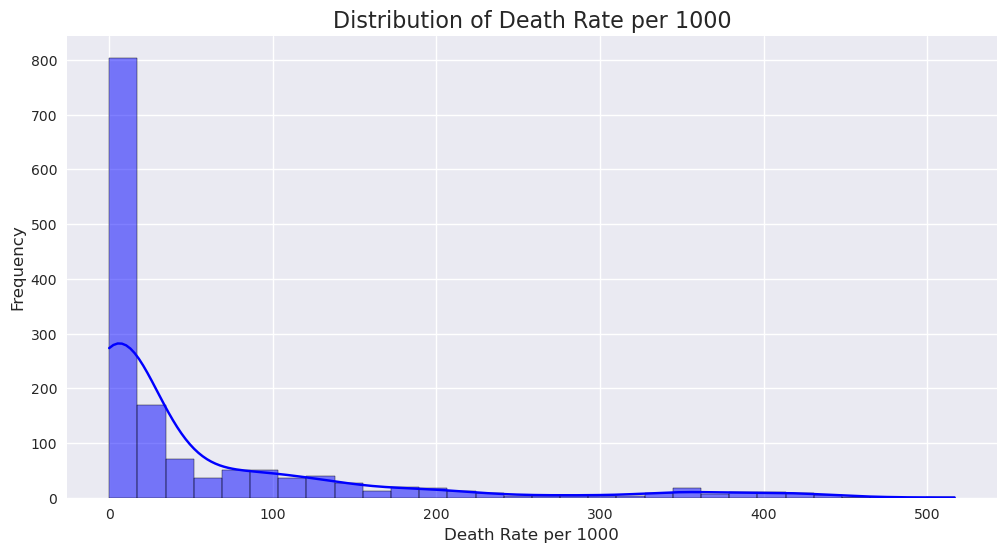

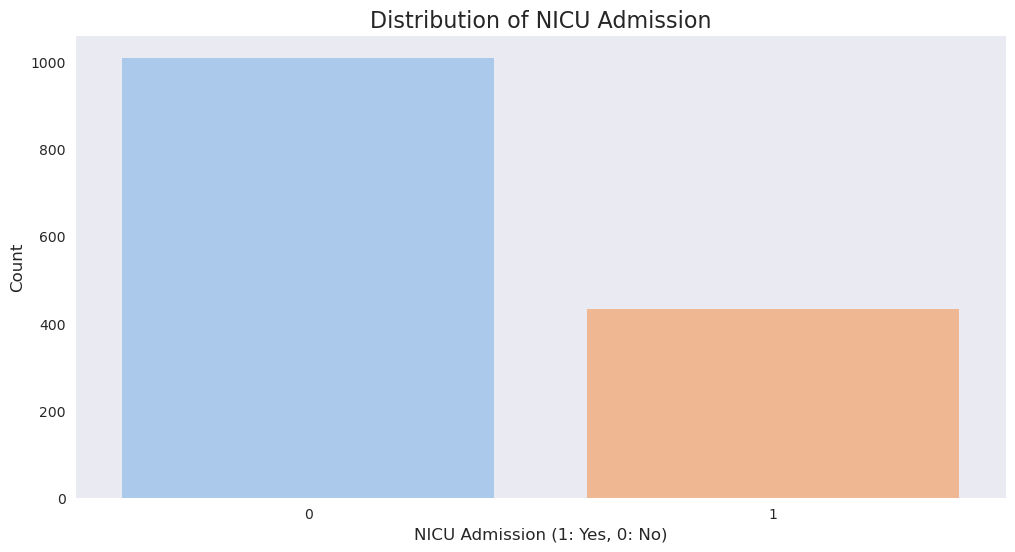

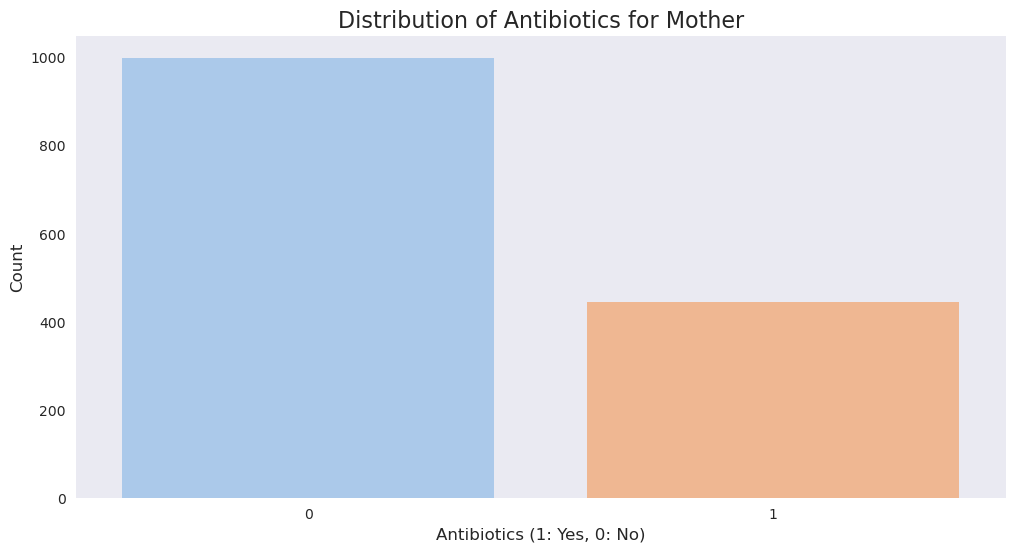

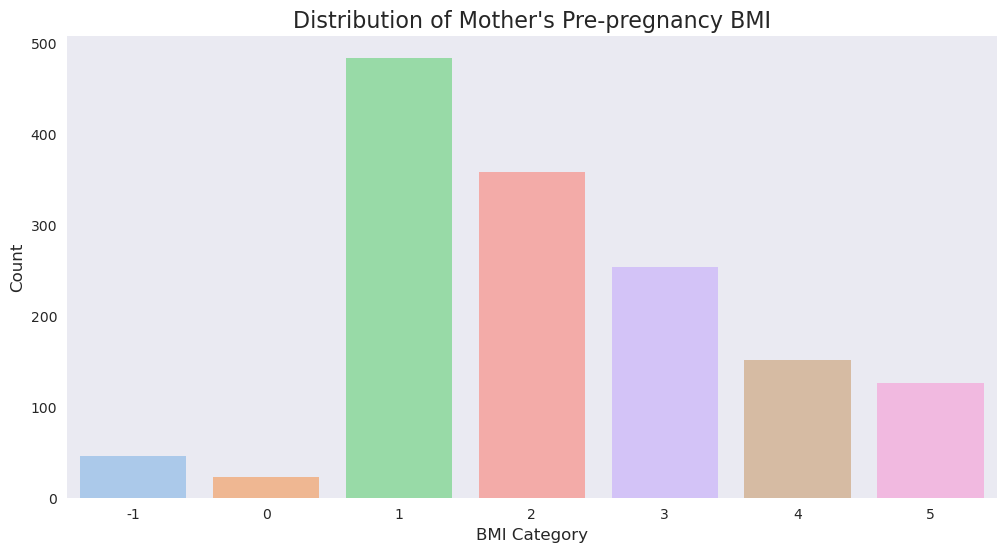

In [36]:
# Thiết lập kích thước mặc định cho các biểu đồ
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Phân phối dữ liệu theo từng cột
def plot_distribution(data, column, title, xlabel):
    plt.figure()
    sns.histplot(cleaned_df[column], kde=True, bins=30, color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

# Lần lượt vẽ phân phối cho các cột số
plot_distribution(cleaned_df, 'Infant birth weight', 'Distribution of Infant Birth Weight', 'Birth Weight (grams)')
plot_distribution(cleaned_df, 'Deaths', 'Distribution of Deaths', 'Number of Deaths')
plot_distribution(cleaned_df, 'Births', 'Distribution of Births', 'Number of Births')
plot_distribution(cleaned_df, 'Death rate per 1000', 'Distribution of Death Rate per 1000', 'Death Rate per 1000')

# Phân phối các cột danh mục đã mã hóa
def plot_categorical_distribution(data, column, title, xlabel):
    plt.figure()
    sns.countplot(x=column, data=data, palette='pastel')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y')
    plt.show()

plot_categorical_distribution(cleaned_df, 'NICU Admission', 'Distribution of NICU Admission', 'NICU Admission (1: Yes, 0: No)')
plot_categorical_distribution(cleaned_df, 'Antibiotics for Mother', 'Distribution of Antibiotics for Mother', 'Antibiotics (1: Yes, 0: No)')
plot_categorical_distribution(cleaned_df, "Mother's Pre-pregnancy BMI", "Distribution of Mother's Pre-pregnancy BMI", 'BMI Category')


### Nhận xét các biểu đồ: 

#### 1. Distribution of Infant Birth Weight
- **Nhận xét:**
  - Phân phối cân nặng sơ sinh tập trung cao ở khoảng dưới 1.000 gram, cho thấy có số lượng lớn trẻ sinh non hoặc nhẹ cân.
  - Có các đỉnh thứ cấp ở mức 2.500–3.000 gram và 3.000–3.500 gram, đây là mức cân nặng phổ biến ở trẻ sơ sinh khỏe mạnh.
  - Đường cong mật độ (kde) chỉ ra xu hướng giảm dần khi cân nặng tăng, phản ánh số lượng trẻ sơ sinh nặng cân hiếm hơn.
- **Ý nghĩa:**
  - Việc tập trung ở các mức cân nặng thấp có thể phản ánh tỷ lệ sinh non cao trong bộ dữ liệu hoặc các vấn đề y tế khác liên quan đến mẹ và trẻ.

---

#### 2. Distribution of Deaths
- **Nhận xét:**
  - Phân phối rất không đối xứng, tập trung mạnh ở số lượng tử vong thấp (0–50 ca tử vong).
  - Số lượng các trường hợp tử vong lớn (trên 100 ca) giảm đáng kể và hiếm xuất hiện.
  - Đường cong mật độ giảm mạnh sau khoảng 50 ca tử vong.
- **Ý nghĩa:**
  - Đa số các nhóm hoặc khu vực ghi nhận rất ít trường hợp tử vong, cho thấy tỷ lệ tử vong trẻ sơ sinh thấp là phổ biến. Tuy nhiên, một số khu vực hoặc hoàn cảnh đặc biệt có thể có tỷ lệ cao hơn.

---

#### 3. Distribution of Births
- **Nhận xét:**
  - Phân phối cũng không đối xứng, tập trung ở số lượng sinh thấp (dưới 100.000 ca sinh).
  - Rất ít các khu vực hoặc nhóm có số lượng sinh cao (trên 300.000 ca), biểu thị ở phần đuôi dài của phân phối.
  - Đường cong mật độ cho thấy xu hướng giảm dần khi số lượng sinh tăng.
- **Ý nghĩa:**
  - Đa số các khu vực hoặc nhóm dân số trong bộ dữ liệu có quy mô sinh nhỏ, nhưng một số nhóm hoặc khu vực đặc biệt (ví dụ, các bang lớn hoặc dân số đông) có số lượng sinh rất lớn.

---

#### 4. Distribution of NICU Admission và Distribution of Anibiotics for mother. 
- **Nhận xét:** 
  - Tỉ lệ trẻ được nhập viện và khả năng người mẹ sử dụng kháng sinh trong thai kỳ là thấp.    
- **Ý nghĩa:**
  - Hai yếu tố trên ảnh hưởng không nhỏ đến sức khỏe của mẹ và của trẻ nhỏ. Khi phân tích sâu hơn ta cần chú ý các thônn tin này.   

--- 

#### 5. Distribution of Mother's Pre-pregnancy BMI
- **Nhận xét:**
  - Phân phối không đồng đều, tập trung chủ yếu ở hai nhóm **Normal (18.5-24.9)** (BMI = 1) và **Overweight (25.0-29.9)** (BMI = 2).
  - Số lượng bà mẹ có BMI **Obesity I (30.0-34.9)** (BMI = 3) giảm dần, tiếp theo là các nhóm **Obesity II (35.0-39.9)** (BMI = 4) và **Extreme Obesity III (>39.9)** (BMI = 5).
  - Các nhóm **Underweight (<18.5)** (BMI = 0) và dữ liệu không xác định (**Unknown or Not Stated**, BMI = -1) có số lượng thấp nhất.

- **Ý nghĩa:**
  - Dữ liệu phản ánh rằng phần lớn bà mẹ trong mẫu thuộc nhóm BMI bình thường và thừa cân, cho thấy mức độ phổ biến của các nhóm này trong dân số.
  - Số lượng bà mẹ ở các nhóm béo phì và gầy (Underweight) thấp hơn, có thể liên quan đến nhận thức sức khỏe hoặc các yếu tố y tế, kinh tế.
  - Việc theo dõi BMI trước mang thai là cần thiết vì BMI cao (béo phì) hoặc thấp (gầy) có thể ảnh hưởng tiêu cực đến kết quả thai kỳ.



### Sau khi đã thấy được sự phân bổ giá trị ta vẽ biểu đồ tương quan để quan sát rõ hơn mối tương quan. 

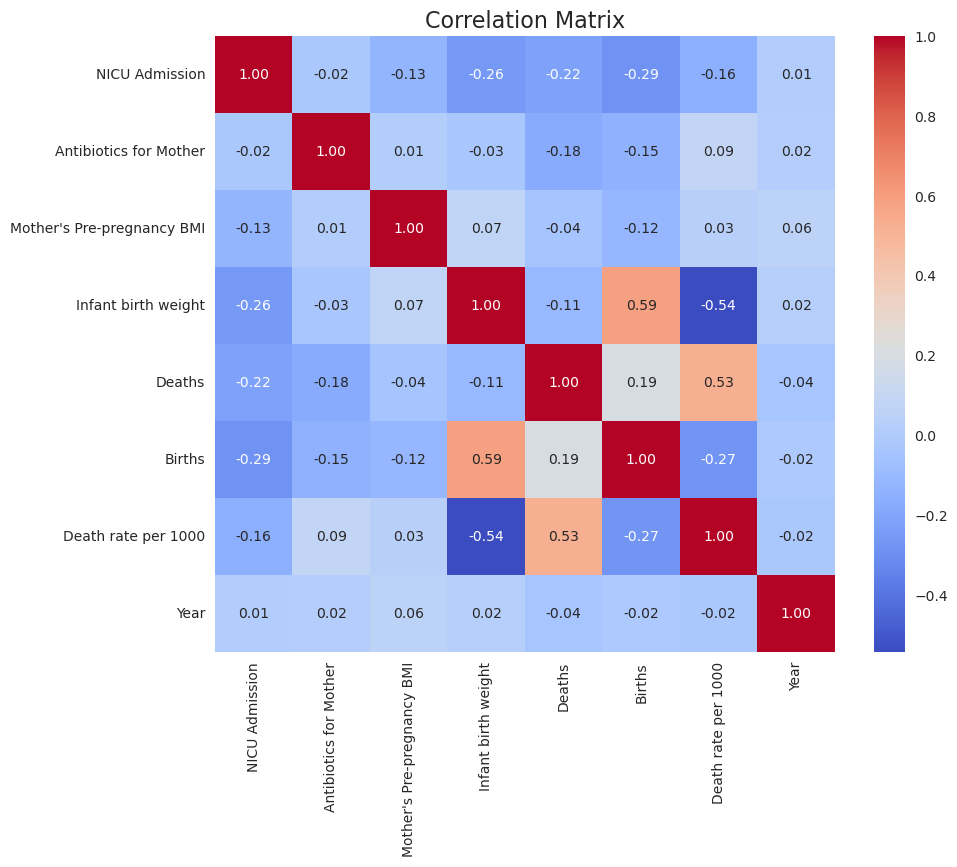

In [37]:
plt.figure(figsize=(10, 8))
correlation_matrix = cleaned_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

- Các biến như `Deaths`, `Births` và `Death rate per 1000` có mỗi quan hệ chặt chẽ với nhau.  
- `Infant birth weight` có mõi quan hệ nghịch với tử vong `Death rate per 1000`. Ta có thể hiểu như sau: Trẻ có cân nặng thấp thường có tỷ lệ tử bong cao hơn. 

### Scatter plot cho hai cột Infant Birth weight và Death Rate

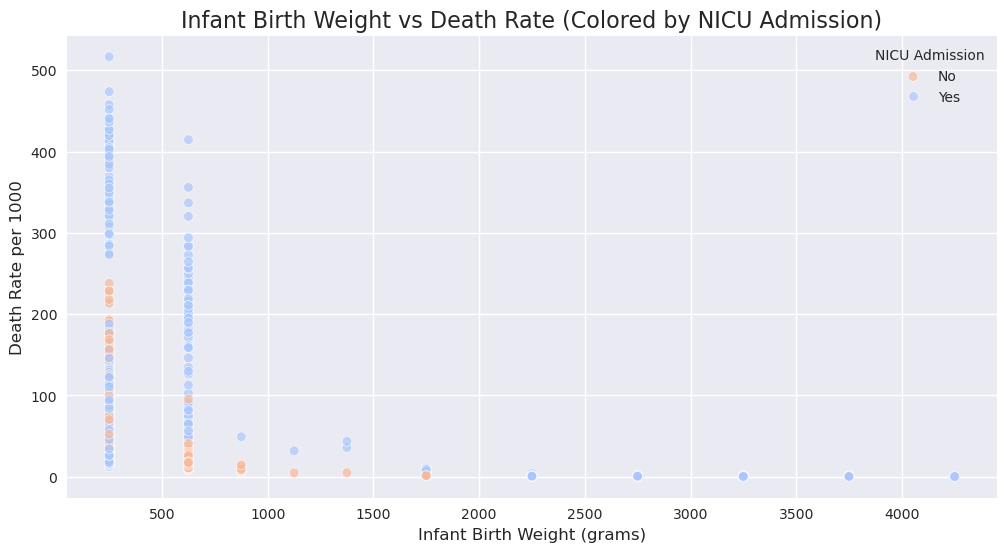

In [38]:
plt.figure()
sns.scatterplot(x='Infant birth weight', y='Death rate per 1000', hue='NICU Admission', data=cleaned_df, palette='coolwarm', alpha=0.7)
plt.title('Infant Birth Weight vs Death Rate (Colored by NICU Admission)', fontsize=16)
plt.xlabel('Infant Birth Weight (grams)', fontsize=12)
plt.ylabel('Death Rate per 1000', fontsize=12)
plt.grid(True)
plt.legend(title='NICU Admission', labels=['No', 'Yes'])
plt.show()

- Trẻ sơ sinh với cân nặng thấp thường có tỷ lệ tử vong cao hơn, đặc biệt với nhóm không nhập viện như NICU (value = 0).  
- Nhóm nhập viện NICU (value = 1) thường có sự phân tán lớn hơn về tỷ lệ tử vong.  